# Importing Required Libraries 

In [1]:
! pip install imblearn
! pip install streamlit
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.feature_selection import SelectKBest

# Importing Dataset And EDA
    - Importing Dataset
    - Renaming Columns
    - Checking for Dupicated Values
    - Gathering Information about Dataset
    - Checking for Null Values in Dataset and Replacing with Mean of the Feature
    
    

In [2]:
churn=pd.read_csv('Churn.csv')
churn

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,HI,area_code_408,50,yes,40,no,9.9,5,2.67,...,127,40.07,223,126,18.96,297.5,116,13.39,2,no
4996,4997,WV,area_code_415,152,no,0,no,14.7,2,3.97,...,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,4998,DC,area_code_415,61,no,0,no,13.6,4,3.67,...,89,23.9,172.8,128,14.69,212.4,97,9.56,1,no
4998,4999,DC,area_code_510,109,no,0,no,8.5,6,2.30,...,67,32.1,171.7,92,14.59,224.4,89,10.10,0,no


In [3]:
churn.rename(columns={'state':'State','area.code': 'Area','account.length': 'Account_Length','voice.plan': 'Voice_Plan',
                      'voice.messages': 'Voice_Messages','intl.plan':'International_Plan',
                      'intl.mins':'International_Mins','intl.calls':'International_Calls',
                      'intl.charge':'International_Charges','day.mins':'Day_Mins','day.calls':'Day_Calls',
                      'day.charge':'Day_Charges', 'eve.mins':'Evening_Mins', 'eve.calls':'Evening_Calls',
                      'eve.charge':'Evening_Charges', 'night.mins':'Night_Mins', 'night.calls':'Night_Calls',
                      'night.charge':'Night_Charges','customer.calls':'Customer_Calls','churn':'Churn'},inplace=True)


In [4]:
churn[churn.duplicated()]

,Unnamed: 0,State,Area,Account_Length,Voice_Plan,Voice_Messages,International_Plan,International_Mins,International_Calls,International_Charges,...,Day_Calls,Day_Charges,Evening_Mins,Evening_Calls,Evening_Charges,Night_Mins,Night_Calls,Night_Charges,Customer_Calls,Churn


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5000 non-null   int64  
 1   State                  5000 non-null   object 
 2   Area                   5000 non-null   object 
 3   Account_Length         5000 non-null   int64  
 4   Voice_Plan             5000 non-null   object 
 5   Voice_Messages         5000 non-null   int64  
 6   International_Plan     5000 non-null   object 
 7   International_Mins     5000 non-null   float64
 8   International_Calls    5000 non-null   int64  
 9   International_Charges  5000 non-null   float64
 10  Day_Mins               5000 non-null   float64
 11  Day_Calls              5000 non-null   int64  
 12  Day_Charges            5000 non-null   object 
 13  Evening_Mins           5000 non-null   object 
 14  Evening_Calls          5000 non-null   int64  
 15  Even

In [6]:
from sklearn.preprocessing import LabelEncoder       
label_encoder=LabelEncoder()
churn['Day_Charges']=churn['Day_Charges'].astype(float)
churn['Evening_Mins']=churn['Evening_Mins'].astype(float)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5000 non-null   int64  
 1   State                  5000 non-null   object 
 2   Area                   5000 non-null   object 
 3   Account_Length         5000 non-null   int64  
 4   Voice_Plan             5000 non-null   object 
 5   Voice_Messages         5000 non-null   int64  
 6   International_Plan     5000 non-null   object 
 7   International_Mins     5000 non-null   float64
 8   International_Calls    5000 non-null   int64  
 9   International_Charges  5000 non-null   float64
 10  Day_Mins               5000 non-null   float64
 11  Day_Calls              5000 non-null   int64  
 12  Day_Charges            4993 non-null   float64
 13  Evening_Mins           4976 non-null   float64
 14  Evening_Calls          5000 non-null   int64  
 15  Even

In [7]:
churn.isna().sum()

Unnamed: 0                0
State                     0
Area                      0
Account_Length            0
Voice_Plan                0
Voice_Messages            0
International_Plan        0
International_Mins        0
International_Calls       0
International_Charges     0
Day_Mins                  0
Day_Calls                 0
Day_Charges               7
Evening_Mins             24
Evening_Calls             0
Evening_Charges           0
Night_Mins                0
Night_Calls               0
Night_Charges             0
Customer_Calls            0
Churn                     0
dtype: int64

In [8]:
churn["Day_Charges"].fillna(churn['Day_Charges'].mean(), inplace = True)
churn["Evening_Mins"].fillna(churn['Evening_Mins'].mean(), inplace = True)
churn.drop(['Unnamed: 0'],axis=1,inplace=True)
churn.isna().sum()

State                    0
Area                     0
Account_Length           0
Voice_Plan               0
Voice_Messages           0
International_Plan       0
International_Mins       0
International_Calls      0
International_Charges    0
Day_Mins                 0
Day_Calls                0
Day_Charges              0
Evening_Mins             0
Evening_Calls            0
Evening_Charges          0
Night_Mins               0
Night_Calls              0
Night_Charges            0
Customer_Calls           0
Churn                    0
dtype: int64

# VISUALIZATIONS And REMOVING OUTLIERS
    - Histograms of all Features except States, Area Code and Categorical Features.
    - Boxplots to check if there are any outliers in Dataset.
    - Removal of outliers using Inter Quartuile Range Method and Distribution Plots.
    - Histograms to check if most of the columns follow Normal Distribution or not after removing outliers.
    - Boxplot to check if most of the outliers are removed.
    - Bar plot to check the number of Records based on Area Code.
    - Bar plot to check the Churn Rate in every State.
    - Bar Plot to check Churn Rate based on Area Code.
    - Bar Plot to check Churn Rate based on Voice Plan.
    - Bar Plot to check Churn Rate based on International Plan.
    - Correlation Matrix to check Correlation of Features with Churn
    

array([[<AxesSubplot:title={'center':'Account_Length'}>,
        <AxesSubplot:title={'center':'Voice_Messages'}>,
        <AxesSubplot:title={'center':'International_Mins'}>,
        <AxesSubplot:title={'center':'International_Calls'}>],
       [<AxesSubplot:title={'center':'International_Charges'}>,
        <AxesSubplot:title={'center':'Day_Mins'}>,
        <AxesSubplot:title={'center':'Day_Calls'}>,
        <AxesSubplot:title={'center':'Day_Charges'}>],
       [<AxesSubplot:title={'center':'Evening_Mins'}>,
        <AxesSubplot:title={'center':'Evening_Calls'}>,
        <AxesSubplot:title={'center':'Evening_Charges'}>,
        <AxesSubplot:title={'center':'Night_Mins'}>],
       [<AxesSubplot:title={'center':'Night_Calls'}>,
        <AxesSubplot:title={'center':'Night_Charges'}>,
        <AxesSubplot:title={'center':'Customer_Calls'}>, <AxesSubplot:>]],
      dtype=object)

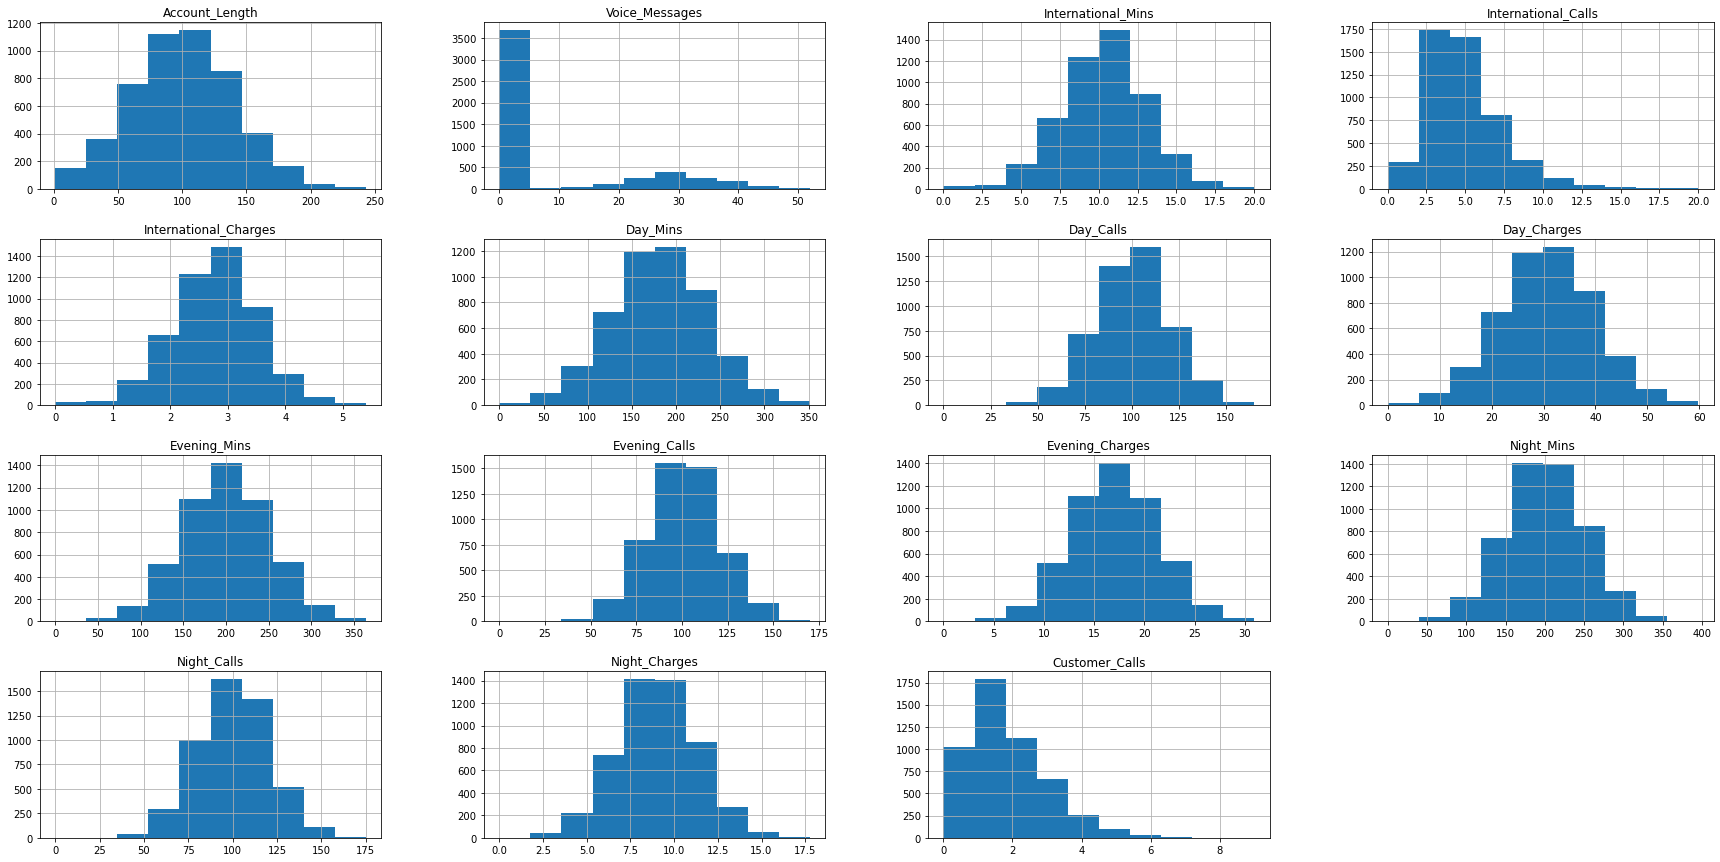

In [9]:
churn.hist(figsize=(30,15))

<AxesSubplot:>

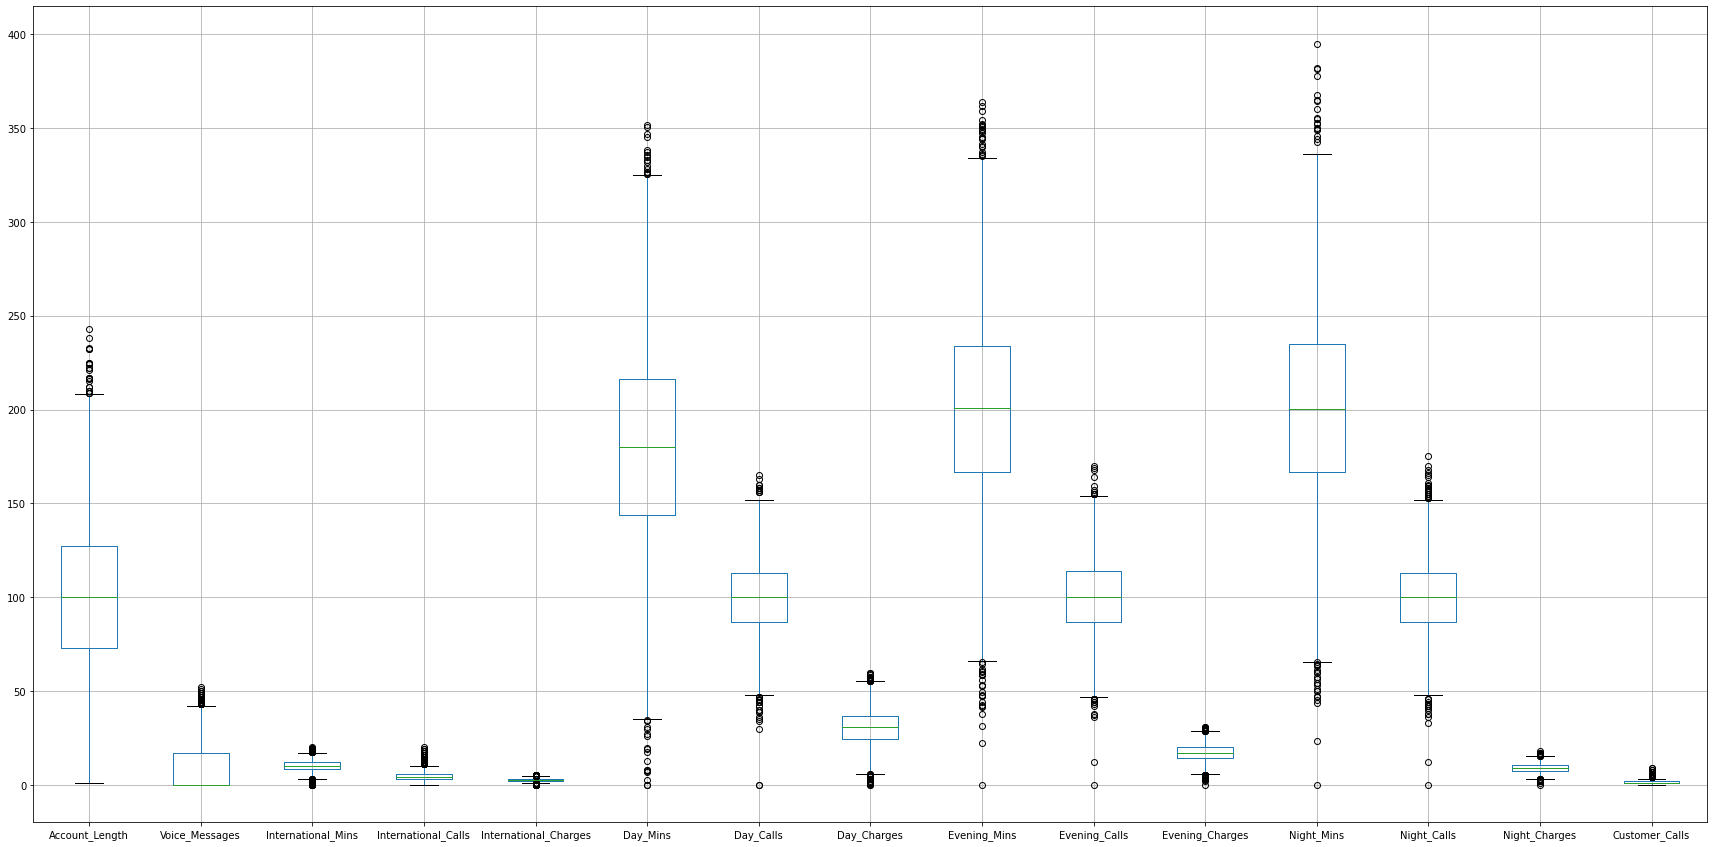

In [10]:
churn.boxplot(figsize=(30,15))

In [11]:
Q1 = churn['Account_Length'].quantile(0.25)
Q3 = churn['Account_Length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Account_Length'] >upper].index,inplace=True)
churn.drop(churn[churn['Account_Length'] <lower].index,inplace=True)
churn.shape

(4976, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Account_Length', ylabel='Density'>

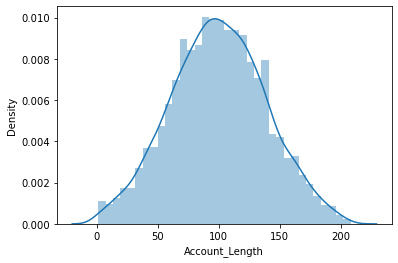

In [12]:
sns.distplot(churn['Account_Length'])

In [13]:
Q1 = churn['Voice_Messages'].quantile(0.25)
Q3 = churn['Voice_Messages'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Voice_Messages'] >upper].index,inplace=True)
churn.drop(churn[churn['Voice_Messages'] <lower].index,inplace=True)
churn.shape

(4916, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Voice_Messages', ylabel='Density'>

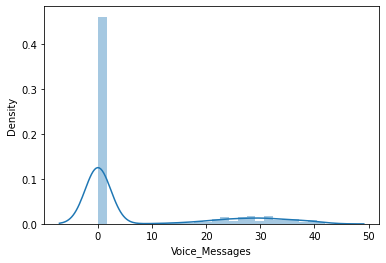

In [14]:
sns.distplot(churn['Voice_Messages'])

In [15]:
Q1 = churn['International_Mins'].quantile(0.25)
Q3 = churn['International_Mins'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['International_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['International_Mins'] <lower].index,inplace=True)
churn.shape

(4851, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='International_Mins', ylabel='Density'>

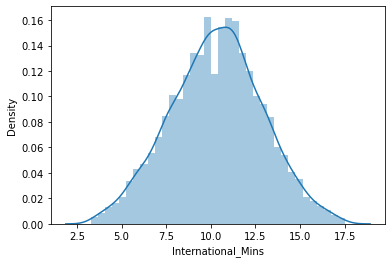

In [16]:
sns.distplot(churn['International_Mins'])

In [17]:
Q1 = churn['International_Calls'].quantile(0.25)
Q3 = churn['International_Calls'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['International_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['International_Calls'] <lower].index,inplace=True)
churn.shape

(4736, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='International_Calls', ylabel='Density'>

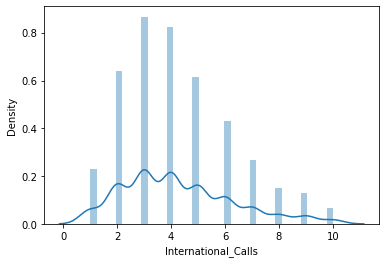

In [18]:
sns.distplot(churn['International_Calls'])

In [19]:
Q1 = churn['International_Charges'].quantile(0.25)
Q3 = churn['International_Charges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['International_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['International_Charges'] <lower].index,inplace=True)
churn.shape

(4723, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='International_Charges', ylabel='Density'>

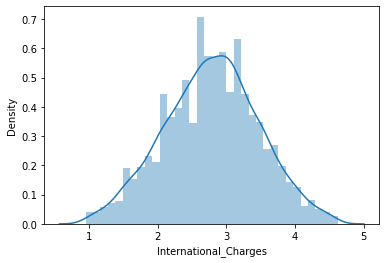

In [20]:
sns.distplot(churn['International_Charges'])

In [21]:
Q1 = churn['Day_Mins'].quantile(0.25)
Q3 = churn['Day_Mins'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Day_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['Day_Mins'] <lower].index,inplace=True)
churn.shape

(4692, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day_Mins', ylabel='Density'>

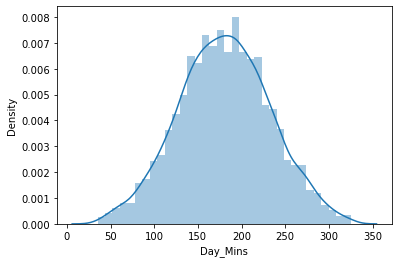

In [22]:
sns.distplot(churn['Day_Mins'])

In [23]:
Q1 = churn['Day_Calls'].quantile(0.25)
Q3 = churn['Day_Calls'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Day_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Day_Calls'] <lower].index,inplace=True)
churn.shape

(4660, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day_Calls', ylabel='Density'>

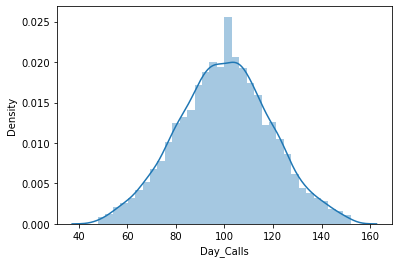

In [24]:
sns.distplot(churn['Day_Calls'])

In [25]:
Q1 = churn['Day_Charges'].quantile(0.25)
Q3 = churn['Day_Charges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Day_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['Day_Charges'] <lower].index,inplace=True)
churn.shape

(4655, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Day_Charges', ylabel='Density'>

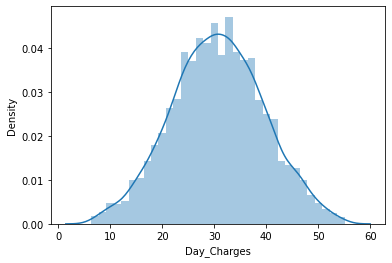

In [26]:
sns.distplot(churn['Day_Charges'])

In [27]:
Q1 = churn['Evening_Mins'].quantile(0.25)
Q3 = churn['Evening_Mins'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Evening_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['Evening_Mins'] <lower].index,inplace=True)
churn.shape

(4611, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Evening_Mins', ylabel='Density'>

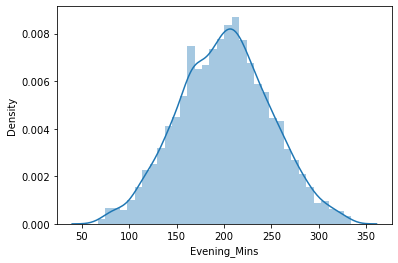

In [28]:
sns.distplot(churn['Evening_Mins'])

In [29]:
Q1 = churn['Evening_Calls'].quantile(0.25)
Q3 = churn['Evening_Calls'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Evening_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Evening_Calls'] <lower].index,inplace=True)
churn.shape

(4579, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Evening_Calls', ylabel='Density'>

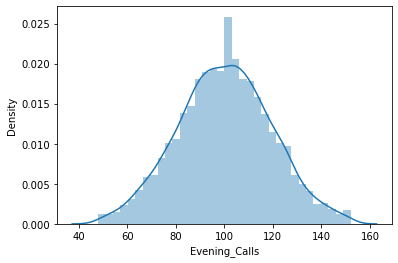

In [30]:
sns.distplot(churn['Evening_Calls'])

In [31]:
Q1 = churn['Evening_Charges'].quantile(0.25)
Q3 = churn['Evening_Charges'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Evening_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['Evening_Charges'] <lower].index,inplace=True)
churn.shape

(4576, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Evening_Charges', ylabel='Density'>

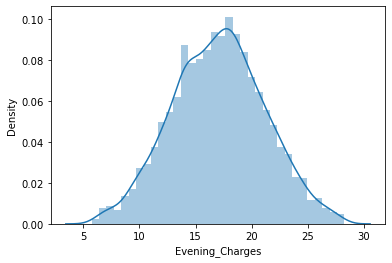

In [32]:
sns.distplot(churn['Evening_Charges'])

In [33]:
Q1 = churn['Night_Mins'].quantile(0.25)
Q3 = churn['Night_Mins'].quantile(0.75)
IQR= Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Night_Mins'] >upper].index,inplace=True)
churn.drop(churn[churn['Night_Mins'] <lower].index,inplace=True)
churn.shape


(4539, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Night_Mins', ylabel='Density'>

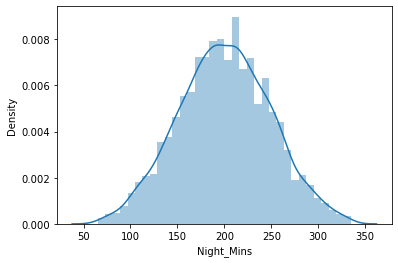

In [34]:
sns.distplot(churn['Night_Mins'])

In [35]:
Q1 = churn['Night_Calls'].quantile(0.25)
Q3 = churn['Night_Calls'].quantile(0.75)
IQR= Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Night_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Night_Calls'] <lower].index,inplace=True)
churn.shape

(4503, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Night_Calls', ylabel='Density'>

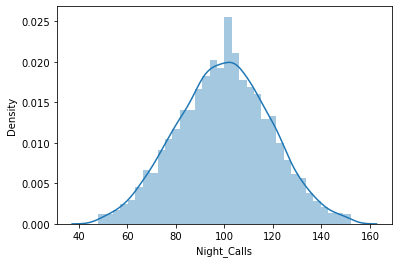

In [36]:
sns.distplot(churn['Night_Calls'])

In [37]:
Q1 = churn['Night_Charges'].quantile(0.25)
Q3 = churn['Night_Charges'].quantile(0.75)
IQR= Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
churn.drop(churn[churn['Night_Charges'] >upper].index,inplace=True)
churn.drop(churn[churn['Night_Charges'] <lower].index,inplace=True)
churn.shape

(4500, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Night_Charges', ylabel='Density'>

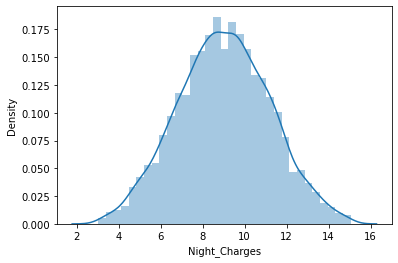

In [38]:
sns.distplot(churn['Night_Charges'])

In [39]:
Q1 = churn['Customer_Calls'].quantile(0.25)
Q3 = churn['Customer_Calls'].quantile(0.75)
IQR= Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)
print(lower)
churn.drop(churn[churn['Customer_Calls'] >upper].index,inplace=True)
churn.drop(churn[churn['Customer_Calls'] <lower].index,inplace=True)
churn.shape

3.5
-0.5


(4137, 20)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Calls', ylabel='Density'>

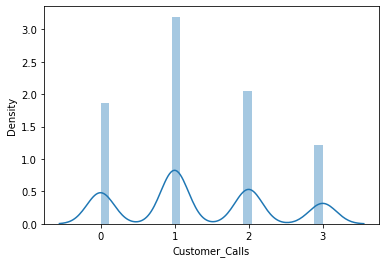

In [40]:
sns.distplot(churn['Customer_Calls'])

array([[<AxesSubplot:title={'center':'Account_Length'}>,
        <AxesSubplot:title={'center':'Voice_Messages'}>,
        <AxesSubplot:title={'center':'International_Mins'}>,
        <AxesSubplot:title={'center':'International_Calls'}>],
       [<AxesSubplot:title={'center':'International_Charges'}>,
        <AxesSubplot:title={'center':'Day_Mins'}>,
        <AxesSubplot:title={'center':'Day_Calls'}>,
        <AxesSubplot:title={'center':'Day_Charges'}>],
       [<AxesSubplot:title={'center':'Evening_Mins'}>,
        <AxesSubplot:title={'center':'Evening_Calls'}>,
        <AxesSubplot:title={'center':'Evening_Charges'}>,
        <AxesSubplot:title={'center':'Night_Mins'}>],
       [<AxesSubplot:title={'center':'Night_Calls'}>,
        <AxesSubplot:title={'center':'Night_Charges'}>,
        <AxesSubplot:title={'center':'Customer_Calls'}>, <AxesSubplot:>]],
      dtype=object)

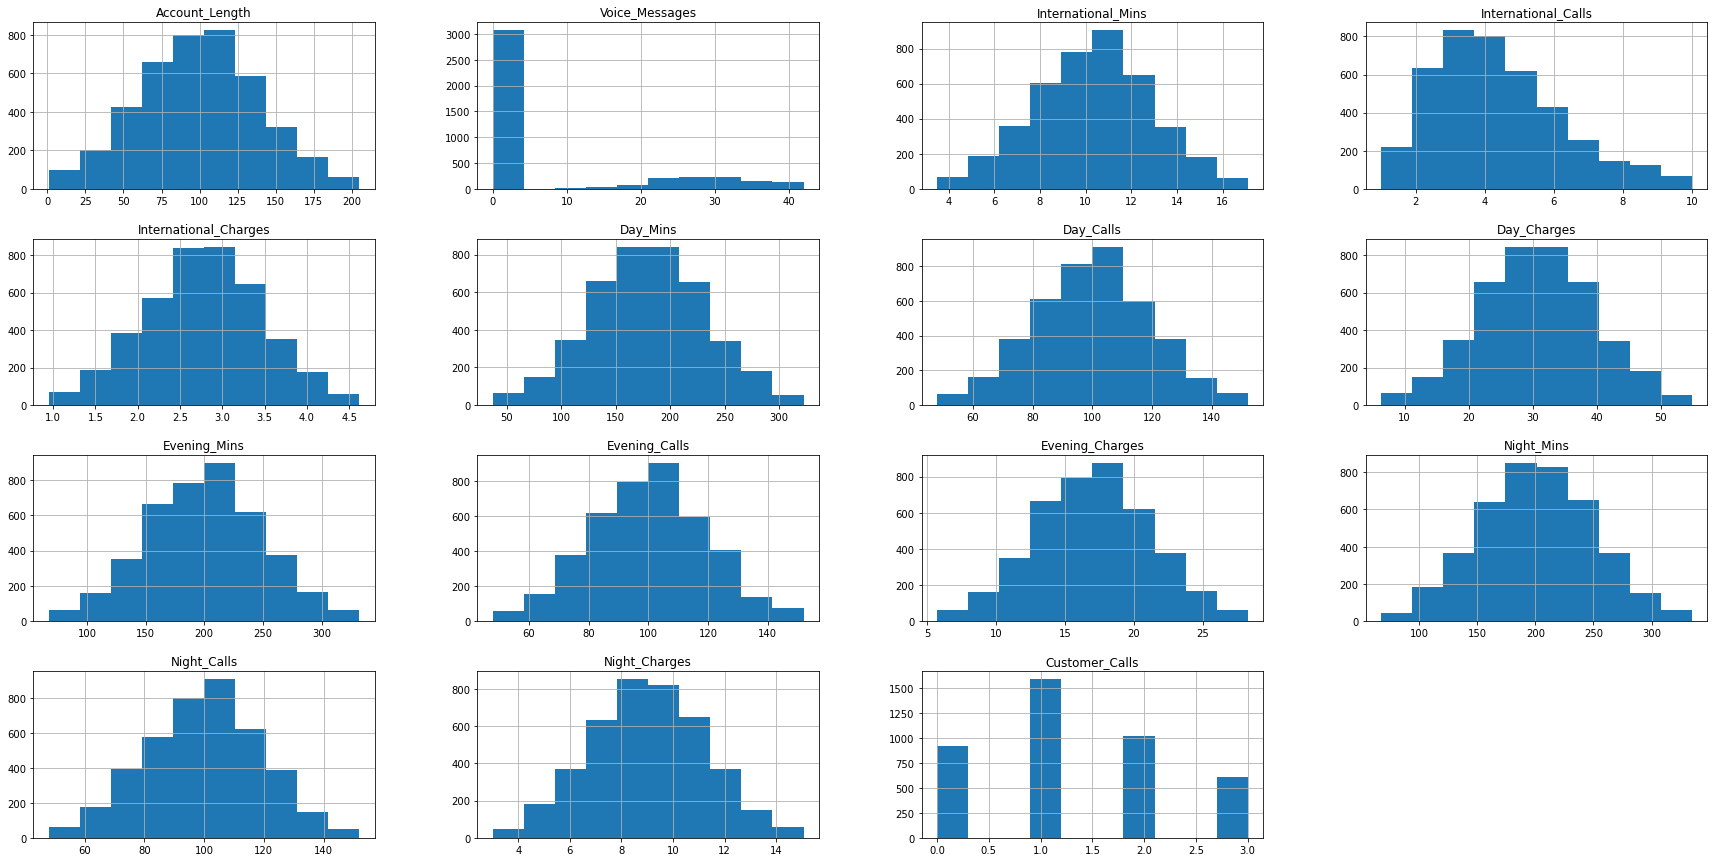

In [41]:
churn.hist(figsize=(30,15))

<AxesSubplot:>

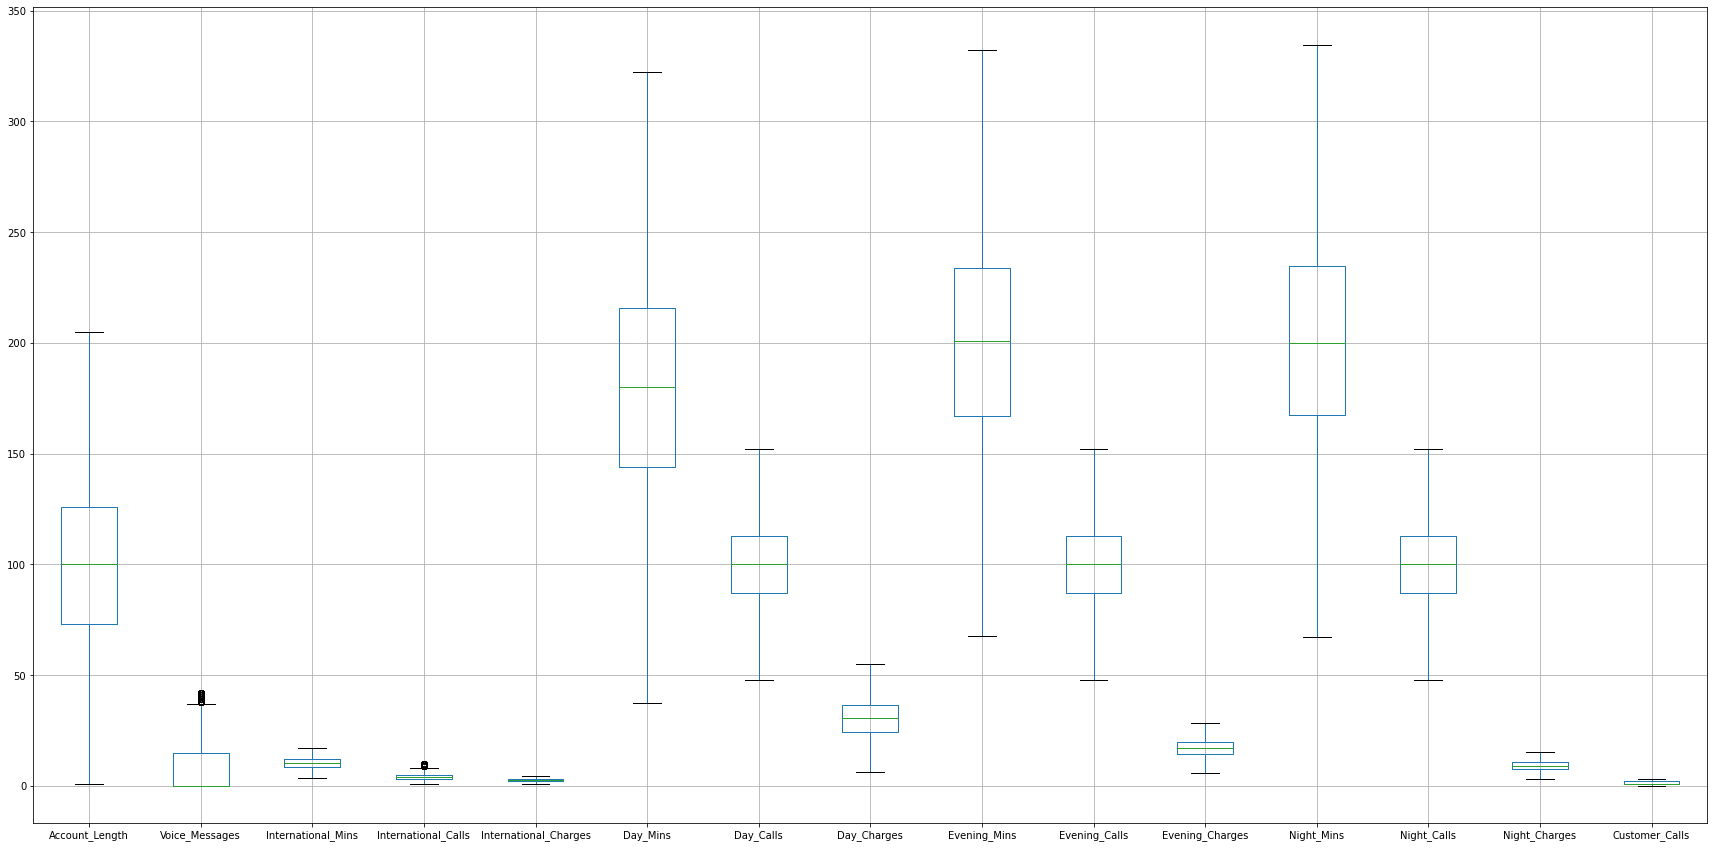

In [42]:
churn.boxplot(figsize=(30,15))

In [43]:
churn

,State,Area,Account_Length,Voice_Plan,Voice_Messages,International_Plan,International_Mins,International_Calls,International_Charges,Day_Mins,Day_Calls,Day_Charges,Evening_Mins,Evening_Calls,Evening_Charges,Night_Mins,Night_Calls,Night_Charges,Customer_Calls,Churn
0,KS,area_code_415,128,yes,25,no,10.0,3,2.70,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,OH,area_code_415,107,yes,26,no,13.7,3,3.70,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,NJ,area_code_415,137,no,0,no,12.2,5,3.29,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
4,OK,area_code_415,75,no,0,yes,10.1,3,2.73,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no
5,AL,area_code_510,118,no,0,yes,6.3,6,1.70,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,NC,area_code_408,75,no,0,no,6.9,7,1.86,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,1,no
4995,HI,area_code_408,50,yes,40,no,9.9,5,2.67,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,2,no
4996,WV,area_code_415,152,no,0,no,14.7,2,3.97,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,3,yes
4997,DC,area_code_415,61,no,0,no,13.6,4,3.67,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,1,no


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Area', ylabel='count'>

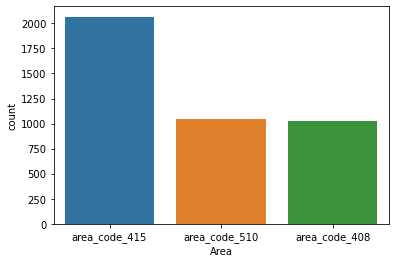

In [44]:
sns.countplot(churn['Area'])

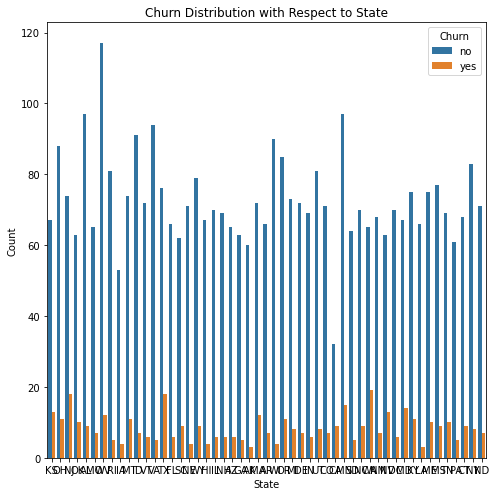

In [45]:
plt.figure(figsize=(7,7))
sns.countplot(data=churn, x='State', hue='Churn')
plt.xlabel('State')                                                    
plt.ylabel('Count')                                                    
plt.title('Churn Distribution with Respect to State')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

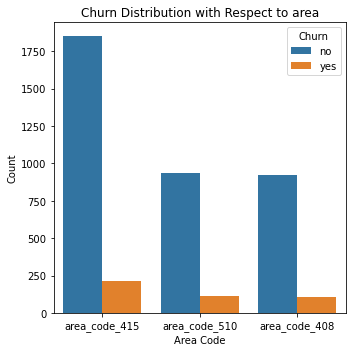

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='Area', hue='Churn')
plt.xlabel('Area Code')                                                    
plt.ylabel('Count')                                                    
plt.title('Churn Distribution with Respect to area')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

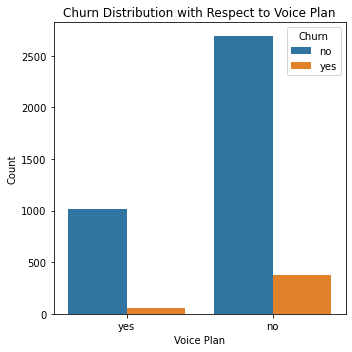

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='Voice_Plan', hue='Churn')
plt.xlabel('Voice Plan')                                                    
plt.ylabel('Count')                                                    
plt.title('Churn Distribution with Respect to Voice Plan')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

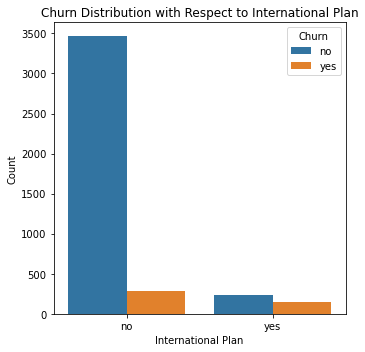

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(data=churn, x='International_Plan', hue='Churn')
plt.xlabel('International Plan')                                                    
plt.ylabel('Count')                                                    
plt.title('Churn Distribution with Respect to International Plan')
plt.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

In [49]:
churn['Voice_Plan']=label_encoder.fit_transform(churn['Voice_Plan'])
churn['International_Plan']=label_encoder.fit_transform(churn['International_Plan'])
churn['Churn']=label_encoder.fit_transform(churn['Churn'])

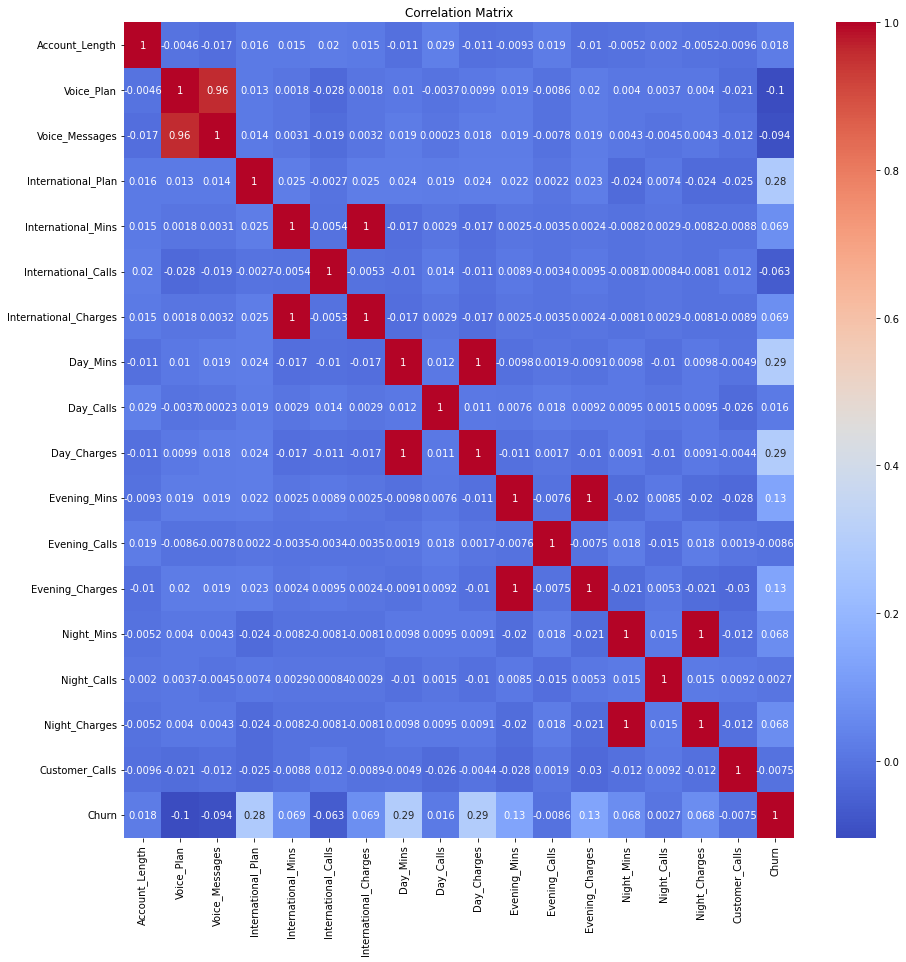

In [50]:
correlation=churn.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# FEATURES EXTRACTION
    - Normalizing The Dataset.
    - Finding Important Features Using Ordinary Least Square Method.
    - Finding P[t] Values for the features who are having Correlation using Ordinary Least Square Method.
    - Finalizing 7 Features whuch are important for Prediction of Churn.
    - Calculating VIF Values for the 7 selected Features.
    - Re-evaluating the Chosen Features using Select K Best Method. 

In [51]:
def norm_churn(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)
churn_norm=norm_churn(churn.iloc[:,3:])
churn_norm

,Voice_Plan,Voice_Messages,International_Plan,International_Mins,International_Calls,International_Charges,Day_Mins,Day_Calls,Day_Charges,Evening_Mins,Evening_Calls,Evening_Charges,Night_Mins,Night_Calls,Night_Charges,Customer_Calls,Churn
0,1.0,0.595238,0.0,0.477941,0.222222,0.476839,0.798667,0.596154,0.798638,0.490559,0.490385,0.490449,0.663677,0.413462,0.663621,0.333333,0.0
1,1.0,0.619048,0.0,0.750000,0.222222,0.749319,0.435637,0.721154,0.435527,0.483384,0.528846,0.483341,0.699925,0.528846,0.700166,0.333333,0.0
2,0.0,0.000000,0.0,0.639706,0.444444,0.637602,0.722553,0.634615,0.722509,0.202795,0.596154,0.202577,0.356876,0.538462,0.357143,0.000000,0.0
4,0.0,0.000000,1.0,0.485294,0.222222,0.485014,0.453525,0.625000,0.453476,0.305136,0.711538,0.305198,0.447683,0.701923,0.447674,1.000000,0.0
5,0.0,0.000000,1.0,0.205882,0.555556,0.204360,0.652403,0.480769,0.652362,0.578172,0.509615,0.577965,0.511211,0.673077,0.511628,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.0,0.000000,0.0,0.250000,0.666667,0.247956,0.467555,0.509615,0.467506,0.474320,0.750000,0.474012,0.231689,0.538462,0.231728,0.333333,0.0
4995,1.0,0.952381,0.0,0.470588,0.444444,0.468665,0.695545,0.759615,0.695482,0.587236,0.750000,0.587295,0.860987,0.653846,0.861296,0.666667,0.0
4996,0.0,0.000000,0.0,0.823529,0.111111,0.822888,0.514907,0.403846,0.514751,0.714879,0.240385,0.714793,0.547459,0.625000,0.547342,1.000000,1.0
4997,0.0,0.000000,0.0,0.742647,0.333333,0.741144,0.361978,0.394231,0.361873,0.397659,0.769231,0.397601,0.542975,0.471154,0.543189,0.333333,0.0


In [52]:
model=smf.ols('Churn~Account_Length+Voice_Plan+Voice_Messages+International_Plan+International_Mins+International_Calls+International_Charges+Day_Mins+Day_Calls+Day_Charges+Evening_Mins+Evening_Calls+Evening_Charges+Night_Mins+Night_Calls+Night_Charges+Customer_Calls',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     62.85
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          1.95e-191
Time:                        20:21:44   Log-Likelihood:                -495.82
No. Observations:                4137   AIC:                             1028.
Df Residuals:                    4119   BIC:                             1142.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5224      0.053     -9.840      0.000      -0.626      -0.418
Account_Length            0.0001      0.000      1.360      0.174   -6.52e-05       0.000
Voice_Plan               -0.1106      0.035     -3.187      0.001      -0.179      -0.043
Voice_Messages            0.0010      0.001      0.896      0.370      -0.001       0.003
International_Plan        0.2889      0.015     19.679      0.000       0.260       0.318
International_Mins       -0.0381      0.401     -0.095      0.924      -0.823       0.747
International_Calls      -0.0094      0.002     -4.578      0.000      -0.013      -0.005
International_Charges     0.1708      1.484      0.115      0.908      -2.738       3.080
Day_Mins                  0.0008      0.003      0.226      0.821      -0.006       0.007
Day_Calls              9.008e-05      0.000      0.406      0.685      -0.000       0.001
Day_Charges               0.0055      0.020      0.279      0.780      -0.033       0.044
Evening_Mins              0.0009      0.001      0.776      0.438      -0.001       0.003
Evening_Calls            -0.0002      0.000     -0.792      0.428      -0.001       0.000
Evening_Charges          -0.0005      0.014     -0.040      0.968      -0.027       0.026
Night_Mins                0.0701      0.067      1.046      0.296      -0.061       0.202
Night_Calls            2.157e-05      0.000      0.097      0.923      -0.000       0.000
Night_Charges            -1.5477      1.489     -1.039      0.299      -4.468       1.372
Customer_Calls            0.0014      0.004      0.310      0.757      -0.007       0.010
==============================================================================
Omnibus:                     1460.103   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4382.469
Skew:                           1.859   Prob(JB):                         0.00
Kurtosis:                       6.407   Cond. No.                     1.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model=smf.ols('Churn~International_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     20.00
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           7.96e-06
Time:                        20:21:46   Log-Likelihood:                -962.90
No. Observations:                4137   AIC:                             1930.
Df Residuals:                    4135   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0189      0.020      0.957      0.339      -0.020       0.058
International_Mins     0.0083      0.002      4.472      0.000       0.005       0.012
==============================================================================
Omnibus:                     2037.400   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8226.843
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.628   Cond. No.                         44.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model=smf.ols('Churn~International_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     19.99
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           7.97e-06
Time:                        20:21:47   Log-Likelihood:                -962.90
No. Observations:                4137   AIC:                             1930.
Df Residuals:                    4135   BIC:                             1942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0189      0.020      0.956      0.339      -0.020       0.058
International_Charges     0.0308      0.007      4.472      0.000       0.017       0.044
==============================================================================
Omnibus:                     2037.403   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8226.866
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.628   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model=smf.ols('Churn~Day_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     384.5
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           6.16e-82
Time:                        20:21:48   Log-Likelihood:                -788.96
No. Observations:                4137   AIC:                             1582.
Df Residuals:                    4135   BIC:                             1595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2036      0.016    -12.439      0.000      -0.236      -0.171
Day_Mins       0.0017   8.72e-05     19.609      0.000       0.002       0.002
==============================================================================
Omnibus:                     1827.411   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6588.771
Skew:                           2.303   Prob(JB):                         0.00
Kurtosis:                       7.124   Cond. No.                         674.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
model=smf.ols('Churn~Day_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     384.2
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           7.02e-82
Time:                        20:21:49   Log-Likelihood:                -789.09
No. Observations:                4137   AIC:                             1582.
Df Residuals:                    4135   BIC:                             1595.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2036      0.016    -12.436      0.000      -0.236      -0.172
Day_Charges     0.0101      0.001     19.602      0.000       0.009       0.011
==============================================================================
Omnibus:                     1827.657   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6590.669
Skew:                           2.304   Prob(JB):                         0.00
Kurtosis:                       7.124   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model=smf.ols('Churn~Evening_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     75.18
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           6.08e-18
Time:                        20:21:50   Log-Likelihood:                -935.61
No. Observations:                4137   AIC:                             1875.
Df Residuals:                    4135   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0641      0.020     -3.200      0.001      -0.103      -0.025
Evening_Mins     0.0008    9.7e-05      8.670      0.000       0.001       0.001
==============================================================================
Omnibus:                     1994.855   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7849.128
Skew:                           2.513   Prob(JB):                         0.00
Kurtosis:                       7.502   Cond. No.                         876.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model=smf.ols('Churn~Evening_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     75.28
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           5.78e-18
Time:                        20:21:51   Log-Likelihood:                -935.56
No. Observations:                4137   AIC:                             1875.
Df Residuals:                    4135   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0638      0.020     -3.192      0.001      -0.103      -0.025
Evening_Charges     0.0099      0.001      8.676      0.000       0.008       0.012
==============================================================================
Omnibus:                     1994.674   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7847.363
Skew:                           2.513   Prob(JB):                         0.00
Kurtosis:                       7.502   Cond. No.                         74.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model=smf.ols('Churn~Night_Mins',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.13
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.25e-05
Time:                        20:21:52   Log-Likelihood:                -963.33
No. Observations:                4137   AIC:                             1931.
Df Residuals:                    4135   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0194      0.020      0.966      0.334      -0.020       0.059
Night_Mins     0.0004   9.72e-05      4.373      0.000       0.000       0.001
==============================================================================
Omnibus:                     2037.383   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8225.086
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.627   Cond. No.                         872.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
model=smf.ols('Churn~Night_Charges',data=churn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.11
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.26e-05
Time:                        20:21:53   Log-Likelihood:                -963.34
No. Observations:                4137   AIC:                             1931.
Df Residuals:                    4135   BIC:                             1943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0194      0.020      0.968      0.333      -0.020       0.059
Night_Charges     0.0094      0.002      4.372      0.000       0.005       0.014
==============================================================================
Omnibus:                     2037.395   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8225.199
Skew:                           2.565   Prob(JB):                         0.00
Kurtosis:                       7.627   Cond. No.                         39.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model_M=smf.ols('Churn~Voice_Plan+International_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit()
model_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     152.2
Date:                Fri, 08 Sep 2023   Prob (F-statistic):          1.92e-200
Time:                        20:21:54   Log-Likelihood:                -498.17
No. Observations:                4137   AIC:                             1012.
Df Residuals:                    4129   BIC:                             1063.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.5134      0.035    -14.518      0.000      -0.583      -0.444
Voice_Plan               -0.0809      0.010     -8.327      0.000      -0.100      -0.062
International_Plan        0.2891      0.015     19.729      0.000       0.260       0.318
International_Calls      -0.0093      0.002     -4.541      0.000      -0.013      -0.005
International_Charges     0.0300      0.006      4.868      0.000       0.018       0.042
Day_Charges               0.0099      0.000     20.694      0.000       0.009       0.011
Evening_Mins              0.0008   8.74e-05      9.715      0.000       0.001       0.001
Night_Mins                0.0005    8.7e-05      5.405      0.000       0.000       0.001
==============================================================================
Omnibus:                     1464.033   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4408.427
Skew:                           1.862   Prob(JB):                         0.00
Kurtosis:                       6.421   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
rsq_vp=smf.ols('Voice_Plan~International_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_vp=1/(1-rsq_vp)

rsq_ip=smf.ols('International_Plan~Voice_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_ip=1/(1-rsq_ip)

rsq_ic=smf.ols('International_Calls~Voice_Plan+International_Plan+International_Charges+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_ic=1/(1-rsq_ic)

rsq_ich=smf.ols('International_Charges~Voice_Plan+International_Plan+International_Calls+Day_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_ich=1/(1-rsq_ich)

rsq_dc=smf.ols('Day_Charges~Voice_Plan+International_Plan+International_Calls+International_Charges+Evening_Mins+Night_Mins',data=churn).fit().rsquared
vif_dc=1/(1-rsq_dc)

rsq_em=smf.ols('Evening_Mins~Voice_Plan+International_Plan+International_Calls+International_Charges+Day_Charges+Night_Mins',data=churn).fit().rsquared
vif_em=1/(1-rsq_em)

rsq_nm=smf.ols('Night_Mins~Voice_Plan+International_Plan+International_Calls+International_Charges+Day_Charges+Evening_Mins',data=churn).fit().rsquared
vif_nm=1/(1-rsq_nm)

df={'Variables':['Voice_Plan','International_Plan','International_Calls','International_Charges','Day_Charges','Evening_Mins','Night_Mins'],'Vif':[vif_vp,vif_ip,vif_ic,vif_ich,vif_dc,vif_em,vif_nm]}
Churn_VIF=pd.DataFrame(df)
Churn_VIF

,Variables,Vif
0,Voice_Plan,1.001447
1,International_Plan,1.002406
2,International_Calls,1.001083
3,International_Charges,1.000997
4,Day_Charges,1.001296
5,Evening_Mins,1.001448
6,Night_Mins,1.001196


In [63]:
x=churn.iloc[:,2:19]
y=churn.iloc[:,-1]
from sklearn.feature_selection import SelectKBest
selection = SelectKBest()  # k=10 default
x= selection.fit_transform(x,y)
selection.get_support()

array([False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False])

# MODEL BUILDING
    - Spliting the Data into Train and Test Datasets.
    - Appliyng Smootheing Technique to avoid Im-blance in Dataset
    - Applying Logistic Regression, Random Forest Classification, Decision Tree Clasification, Gradient Boosting Method
      to get Better Accuracy.
    - Building A Table for the Accuracies we got for the above mentioned Models.

In [64]:
x=pd.concat([churn.iloc[:,3],churn.iloc[:,5],churn.iloc[:,7:9],churn.iloc[:,11:13],churn.iloc[:,15]],axis=1)
y=churn.iloc[:,-1]
st=SMOTEENN()
X,Y = st.fit_resample(x,y)
print(X)
print(Y)

      Voice_Plan  International_Plan  International_Calls  \
0              1                   0                    3   
1              1                   0                    3   
2              0                   1                    3   
3              0                   1                    6   
4              1                   0                    4   
...          ...                 ...                  ...   
5469           0                   0                    4   
5470           0                   0                    2   
5471           0                   1                    3   
5472           0                   0                    3   
5473           0                   0                    4   

      International_Charges  Day_Charges  Evening_Mins  Night_Mins  
0                  2.700000    45.070000    197.400000  244.700000  
1                  3.700000    27.470000    195.500000  254.400000  
2                  2.730000    28.340000    148.300000  186.

In [65]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4105, 7), (1369, 7), (4105,), (1369,))

Logistic Regression

In [66]:
Log_reg = LogisticRegression()
Log_reg.fit(x_train, y_train)
log_pred = Log_reg.predict(x_test)

# Print evaluation metrics for Logistic Regression
print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.8429510591672754
Confusion matrix :
 [[471 100]
 [115 683]]
Classification report :
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       571
           1       0.87      0.86      0.86       798

    accuracy                           0.84      1369
   macro avg       0.84      0.84      0.84      1369
weighted avg       0.84      0.84      0.84      1369



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Morest Classification

In [67]:
seed=7
num_trees=50 
kFold=KFold(n_splits=10,random_state=seed,shuffle=True)
model_RF=RandomForestClassifier(n_estimators=num_trees,max_features=7)
result=cross_val_score(model_RF,X,Y,cv=kFold)
model_RF.fit(x_train,y_train)
RF_pred=model_RF.predict(x_test)

print(f'Accuracy score: {accuracy_score(RF_pred, y_test)}')
print(f'Confusion matrix:\n{confusion_matrix(RF_pred, y_test)}')
print(f'Classification report:\n{classification_report(RF_pred, y_test)}')

Accuracy score: 0.9408327246165084
Confusion matrix:
[[550  45]
 [ 36 738]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       595
           1       0.94      0.95      0.95       774

    accuracy                           0.94      1369
   macro avg       0.94      0.94      0.94      1369
weighted avg       0.94      0.94      0.94      1369



Decision Tree Classification

In [68]:
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train, y_train)
dtc_pred = Dtc.predict(x_test)

# Print evaluation metrics for decisionTree Classifier
print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.9108838568298028
Confusion matrix :
 [[510  46]
 [ 76 737]]
Classification report :
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       556
           1       0.94      0.91      0.92       813

    accuracy                           0.91      1369
   macro avg       0.91      0.91      0.91      1369
weighted avg       0.91      0.91      0.91      1369



Gradient Boosting Classifier

In [69]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gb_pred = gbc.predict(x_test)

print(f'Accuracy score : {accuracy_score(gb_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(gb_pred, y_test)}')
print(f'Classification report :\n {classification_report(gb_pred, y_test)}')

Accuracy score : 0.9006574141709277
Confusion matrix :
 [[544  94]
 [ 42 689]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       638
           1       0.88      0.94      0.91       731

    accuracy                           0.90      1369
   macro avg       0.90      0.90      0.90      1369
weighted avg       0.90      0.90      0.90      1369



In [70]:
model_accuracy={'Models':['Logistic Regression','Random Forest','Decision Tree','Gradient Boosting'],'Accuracy':[accuracy_score(log_pred, y_test)*100,accuracy_score(RF_pred, y_test)*100,accuracy_score(dtc_pred, y_test)*100,accuracy_score(gb_pred, y_test)*100]}
model_accuracy
Accuracy_DF=pd.DataFrame(model_accuracy)
Accuracy_DF

,Models,Accuracy
0,Logistic Regression,84.295106
1,Random Forest,94.083272
2,Decision Tree,91.088386
3,Gradient Boosting,90.065741


# Creating Dataset using the 7 Important Features and Saving the Dataset

In [71]:
Churn=churn.drop(['State','Area','Account_Length','Voice_Messages','International_Mins','Day_Mins','Day_Calls','Evening_Calls','Evening_Charges','Night_Calls','Night_Charges','Customer_Calls'],axis=1)
Churn

,Voice_Plan,International_Plan,International_Calls,International_Charges,Day_Charges,Evening_Mins,Night_Mins,Churn
0,1,0,3,2.70,45.07,197.4,244.7,0
1,1,0,3,3.70,27.47,195.5,254.4,0
2,0,0,5,3.29,41.38,121.2,162.6,0
4,0,1,3,2.73,28.34,148.3,186.9,0
5,0,1,6,1.70,37.98,220.6,203.9,0
...,...,...,...,...,...,...,...,...
4994,0,0,7,1.86,29.02,193.1,129.1,0
4995,1,0,5,2.67,40.07,223.0,297.5,0
4996,0,0,2,3.97,31.31,256.8,213.6,1
4997,0,0,4,3.67,23.90,172.8,212.4,0


In [72]:
Churn.to_csv('Churn_Without_Outliers',encoding='utf_8')